In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cust = pd.read_csv('/content/Customers.csv')
prod = pd.read_csv('/content/Products.csv')
trans = pd.read_csv('/content/Transactions.csv')

In [ ]:
cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
prod.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [ ]:
trans.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [ ]:
cust.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [ ]:
cust.shape

(200, 4)

In [ ]:
trans.shape

(1000, 7)

In [ ]:
prod.shape

(100, 4)

In [ ]:
cust.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [ ]:
prod.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [ ]:
trans.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [ ]:
trans.isnull().sum()

(TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64,)

In [ ]:
cust.isnull().sum()

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,)

In [ ]:

prod.isnull().sum()

(ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,)

In [ ]:
trans_cust = trans.merge(cust, on="CustomerID", how="left")

In [ ]:
trans_cust.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [ ]:
fd=trans_cust.merge(prod, on="ProductID", how="left")
fd

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [ ]:
fd.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000,1000,1000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN,199,4,178,66,4,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN,Abigail Jones,South America,2022-04-16,ActiveWear Smartwatch,Books,NaN
freq,1,11,19,1,NaN,NaN,NaN,11,304,19,40,270,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407,NaN,NaN,NaN,NaN,NaN,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639,NaN,NaN,NaN,NaN,NaN,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000,NaN,NaN,NaN,NaN,NaN,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000,NaN,NaN,NaN,NaN,NaN,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000,NaN,NaN,NaN,NaN,NaN,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000,NaN,NaN,NaN,NaN,NaN,404.40000


In [ ]:
fd.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [ ]:
fd.shape

(1000, 13)

In [ ]:
#lowest priced prod
maxp=prod.Price.max()
maxp

497.76

In [ ]:
row_with_max_price = prod.loc[prod['Price'] == maxp]
row_with_max_price

,ProductID,ProductName,Category,Price
74,P075,TechPro Textbook,Books,497.76


In [ ]:
#lowest priced prod
minp=prod.Price.min()
minp

16.08

In [ ]:
row_with_min_price = prod.loc[prod['Price'] == minp]
row_with_min_price

,ProductID,ProductName,Category,Price
55,P056,SoundWave Smartwatch,Electronics,16.08


In [ ]:
fd.Quantity.max()
row_with_max_price = prod.loc[prod['Price'] == minp]

4

In [ ]:
prodsales = fd.groupby('ProductName')['Quantity'].sum()
prodwidmostsale = prodsales.idxmax()
salesc = prodsales.max()

In [ ]:
print(f"The product with the most sales is '{prodwidmostsale}' with a total of {salesc} sales.")

The product with the most sales is 'ActiveWear Smartwatch' with a total of 100 sales.


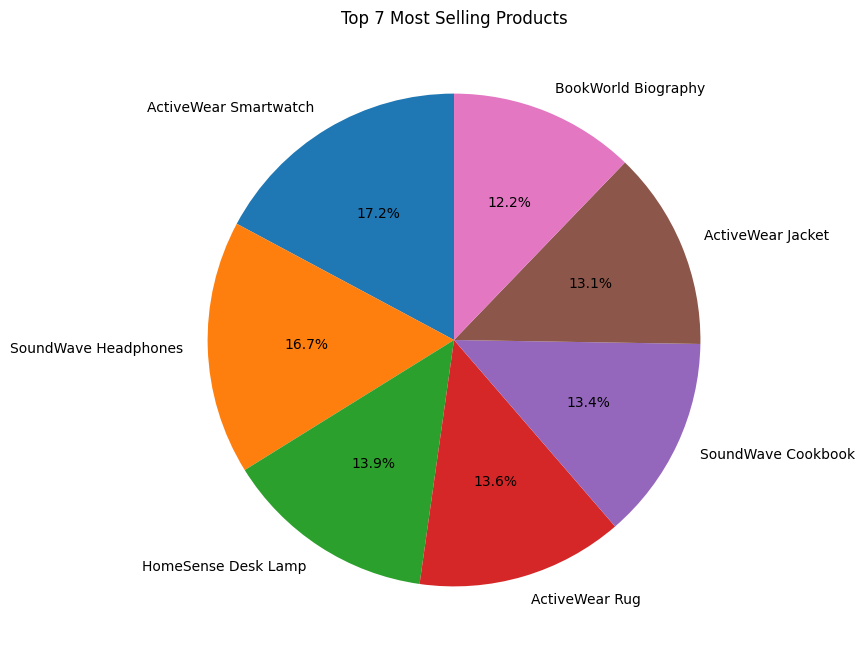

In [ ]:
top7products = prodsales.nlargest(7)

plt.figure(figsize=(8, 8))
plt.title('Top 7 Most Selling Products')
plt.pie(top7products, labels=top7products.index, autopct='%1.1f%%', startangle=90)
plt.show()

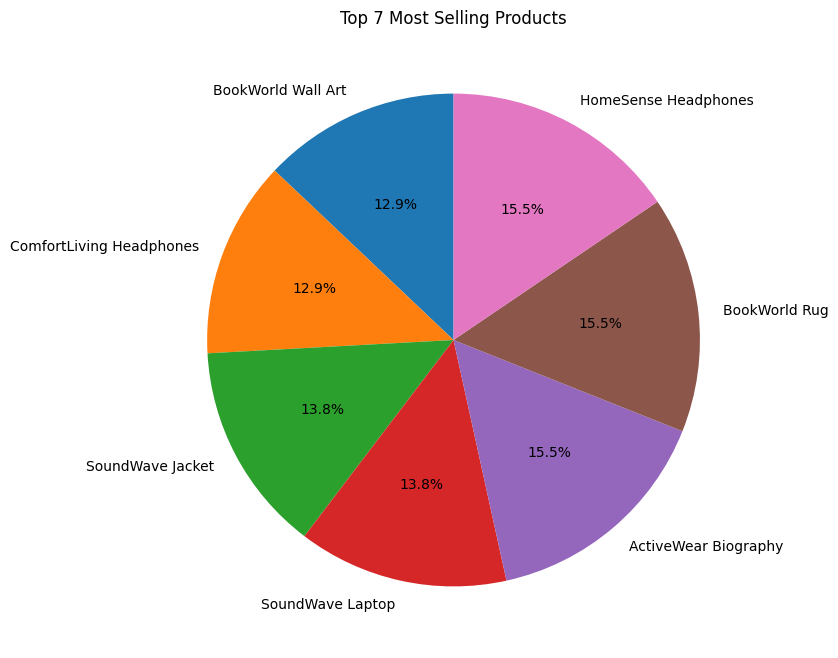

In [ ]:
least7products = prodsales.nsmallest(7)

plt.figure(figsize=(8, 8))
plt.title('Top 7 Most Selling Products')
plt.pie(least7products, labels=least7products.index, autopct='%1.1f%%', startangle=90)
plt.show()

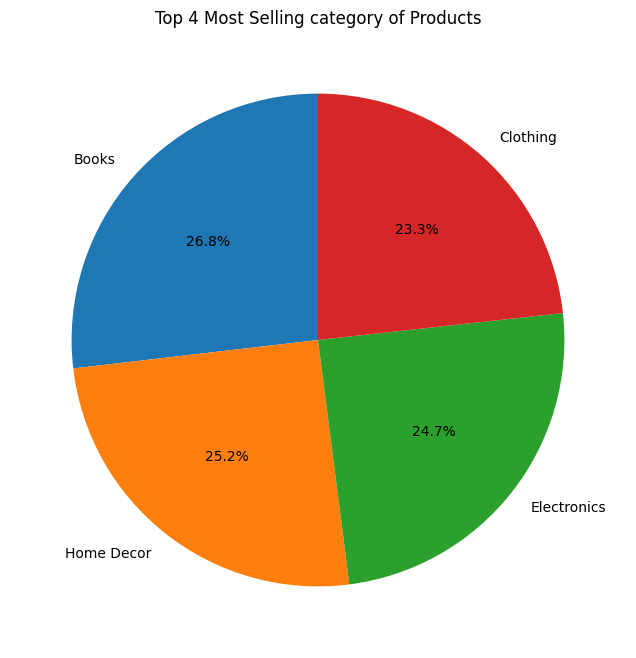

In [ ]:
catsales = fd.groupby('Category')['Quantity'].sum()
catwidmostsale = catsales.idxmax()
top7cats = catsales.nlargest(7)

plt.figure(figsize=(8, 8))
plt.title('Top 4 Most Selling category of Products')
plt.pie(top7cats, labels=top7cats.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [ ]:
custo = fd.groupby('CustomerID')['Quantity'].sum()
topcustomers = custo.nlargest(3)
maxpurch = topcustomers.index[0]
maxpurchc = topcustomers.iloc[0]

second_purch = topcustomers.index[1]
second_purchc = topcustomers.iloc[1]

third_purch = topcustomers.index[2]
third_purchc = topcustomers.iloc[2]
print(f"The first three customerwith high no of purch are \n '{maxpurch}' with a total of {maxpurchc} purchases \n '{second_purch}' with a total of {second_purchc} purchases and \n '{third_purch}' with a total of {third_purchc} purchases.")

The first three customerwith high no of purch are 
 'C0109' with a total of 32 purchases 
 'C0165' with a total of 30 purchases and 
 'C0075' with a total of 28 purchases.


In [ ]:
#what did our the most reg cust purchase???????????????????

In [ ]:
custdata = fd[fd['CustomerID'] == 'C0109']
mpid = custdata.groupby('ProductID')['Quantity'].sum().idxmax()
nou = custdata.groupby('ProductID')['Quantity'].sum().max()
name = fd[fd['ProductID'] == mpid]['ProductName'].iloc[0]
print(f"The product purchased the most by our reg cust is the one and only \nbrand new '{name}' (Product ID: {mpid}) \nwith a total of {nou} units.")


The product purchased the most by our reg cust is the one and only 
brand new 'HomeSense Sweater' (Product ID: P100) 
with a total of 6 units.


In [ ]:
eie = prod[prod['ProductID'] == mpid]['Price'].iloc[0]
eie

126.34

In [ ]:
print(f"the contributions of our beloved cust is ${eie*6} hehehe.")

the contributions of our beloved cust is $758.04 hehehe.


In [ ]:

purchc = fd.groupby('CustomerID')['TransactionID'].count()
singpurch = purchc[purchc == 1].index

singpurchprod = fd[fd['CustomerID'].isin(singpurch)][['CustomerID', 'ProductName']]

singpurchprod

,CustomerID,ProductName
9,C0130,ComfortLiving Bluetooth Speaker
52,C0150,TechPro Running Shoes
276,C0014,ComfortLiving Cookware Set
398,C0060,HomeSense Rug
428,C0097,HomeSense Wall Art
452,C0080,SoundWave Rug
531,C0033,HomeSense Sweater
549,C0020,SoundWave Headphones
831,C0058,ActiveWear Jacket
857,C0151,ComfortLiving Rug


In [ ]:
'''Therefore there isn't a product that doesn't satisfy the customer cuz ,
the products purchased by the one-time customers are unique, distinct'''

"Therefore there isn't a product that doesn't satisfy the customer cuz , \nthe products purchased by the one-time customers are unique, distinct"